In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Read the data set

In [2]:
df=pd.read_csv('expenses.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### How many observations and variables are there?

In [3]:
df.shape

(1338, 7)

#### What are the different types of variables?

In [4]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

#### What values are contained in the variables?

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1336 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### Impute missing values in bmi variable with mean.

In [6]:
df['age'].mean()

39.31091180866966

In [7]:
df=df.fillna(df['age'].mean())

#### For numeric data, generate some summary statistics.

In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.310912,30.681332,1.094918,13270.422265
std,14.185613,6.104477,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.315000,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.752500,2.000000,16639.912515
max,95.000000,53.130000,5.000000,63770.428010


#### Which variables are skewed?

In [9]:
df.skew()

age         0.114689
bmi         0.279645
children    0.938380
charges     1.515880
dtype: float64

#### Find the frequency distribution of gender in the dataset.

In [10]:
df.value_counts('sex')

sex
male      676
female    662
dtype: int64

#### Find how many smokers and non-smokers are there in the dataset.

In [11]:
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [12]:
df.value_counts('smoker')

smoker
no     1064
yes     274
dtype: int64

#### Find the frequency distribution of different regions in the dataset.

In [13]:
df.value_counts('region')

region
southeast    364
southwest    325
northwest    325
northeast    324
dtype: int64

#### Cross tabulate the columns sex, smoker and region columns

In [14]:
pd.crosstab(index=[df.sex,df.smoker],columns=df.region)     #by cross tab method

region         northeast  northwest  southeast  southwest
sex    smoker                                            
female no            132        135        139        141
       yes            29         29         36         21
male   no            125        132        134        126
       yes            38         29         55         37

In [15]:
pd.crosstab(index=df.region,columns=[df.sex,df.smoker])

sex       female     male    
smoker        no yes   no yes
region                       
northeast    132  29  125  38
northwest    135  29  132  29
southeast    139  36  134  55
southwest    141  21  126  37

In [16]:
df.groupby(['sex','smoker','region']).sum()      # by groupby method

age          bmi  children       charges
sex    smoker region                                              
female no     northeast  5259  3939.155912       126  1.272536e+06
              northwest  5367  3980.975000       159  1.186245e+06
              southeast  5431  4556.420000       150  1.173189e+06
              southwest  5654  4237.100000       160  1.161007e+06
       yes    northeast  1123   790.590000        36  8.129293e+05
              northwest  1126   820.610000        24  8.604539e+05
              southeast  1413  1161.050000        34  1.189254e+06
              southwest   778   632.700000        22  6.654478e+05
male   no     northeast  4902  3623.185912       143  1.083005e+06
              northwest  5091  3818.810000       140  1.098331e+06
              southeast  5127  4573.360000       141  1.019606e+06
              southwest  5151  3908.500000       141  9.801421e+05
       yes    northeast  1439  1123.280000        34  1.175198e+06
              northwest  1155   869.535000        50  8.906823e+05
              southeast  2266  1850.750000        57  1.981641e+06
              southwest  1316  1165.600000        48  1.206158e+06

#### Check for missing NA values in different columns of the dataset

In [17]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### Create a boxplot to check for outliers in age and bmi columns.

<AxesSubplot:xlabel='age'>

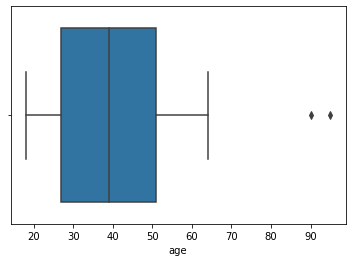

In [18]:
sns.boxplot(x=df.age)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

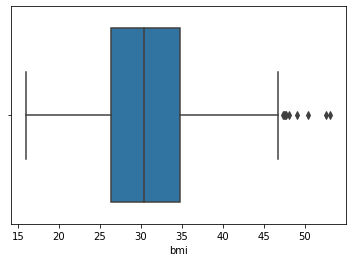

In [19]:
sns.boxplot(df.bmi)

#### At which positions are the outliers lying?

In [20]:
# By z score or by tukey (outlaiers detection)
# here we are finding range with the help of boxplot

In [21]:
age=[]
for x in df['age']:
    if x>80:
        age.append(x)

In [22]:
age

[90, 95]

In [23]:
np.where(df['age']==90),np.where(df['age']==95)

((array([14], dtype=int64),), (array([15], dtype=int64),))

In [24]:
df.iloc[14:16]   #(position of outliers on age)

,age,sex,bmi,children,smoker,region,charges
14,90,male,42.13,0,yes,southeast,39611.7577
15,95,male,24.60,1,no,southwest,1837.2370


In [25]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.310912,30.681332,1.094918,13270.422265
std,14.185613,6.104477,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.315000,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.752500,2.000000,16639.912515
max,95.000000,53.130000,5.000000,63770.428010


In [26]:
# by tukey method  
# l=(1st quartile) teta 1 - 1.5*IQR(inter quartile range=quartile 3 - quartile 1)
# u=(3st quartile) teta 3 - 1.5*IQR(inter quartile range=quartile 3 - quartile 1)
# quartile can be find in describe func.
l=26-1.5*(34-26)
print(l)

14.0


In [27]:
u=34+(1.5*(34-26))
u

46.0

In [28]:
bmi=[]
for y in df['bmi']:
    if y<l:
        bmi.append(y)
    elif y>u:
        bmi.append(y)

In [29]:
print(bmi,end='')

[49.06, 48.07, 47.52, 46.75, 46.53, 47.41, 46.7, 46.2, 46.53, 50.38, 47.6, 46.53, 46.09, 52.58, 47.74, 53.13]

In [30]:
# finding rows
b=[]
for x in bmi:
    b.append(np.where(df.bmi==x))
    

In [31]:
print(b)

[(array([116], dtype=int64),), (array([286], dtype=int64),), (array([401], dtype=int64),), (array([438], dtype=int64),), (array([454, 660, 930], dtype=int64),), (array([543], dtype=int64),), (array([547], dtype=int64),), (array([549], dtype=int64),), (array([454, 660, 930], dtype=int64),), (array([847], dtype=int64),), (array([860], dtype=int64),), (array([454, 660, 930], dtype=int64),), (array([941], dtype=int64),), (array([1047], dtype=int64),), (array([1088], dtype=int64),), (array([1317], dtype=int64),)]


In [32]:
df.iloc[[116,286,401,438,454,660,930,847,860,941,1047,1088,1317]]  # position on outliers on bmi

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.3254
286,46,female,48.07,2,no,northeast,9432.9253
401,47,male,47.52,1,no,southeast,8083.9198
438,52,female,46.75,5,no,southeast,12592.5345
454,32,male,46.53,2,no,southeast,4686.3887
660,37,male,46.53,3,no,southeast,6435.6237
930,26,male,46.53,1,no,southeast,2927.0647
847,23,male,50.38,1,no,southeast,2438.0552
860,37,female,47.60,2,yes,southwest,46113.5110
941,50,female,46.09,1,no,southeast,9549.5651


#### Visualize the data - univariate analysis - draw a histogram for bmi.

<AxesSubplot:xlabel='bmi', ylabel='Count'>

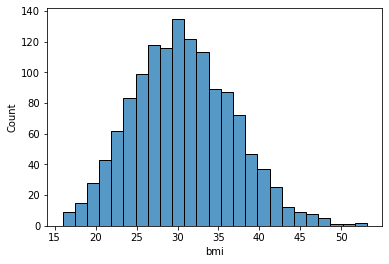

In [33]:
sns.histplot(df.bmi)

#### Create a scatter plot for age and charges.

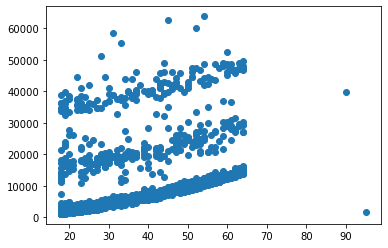

In [34]:
plt.scatter(x=df.age,y=df.charges)

#### Do males generally have higher expenses than females?

In [35]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [36]:
df.groupby(['sex','charges']).sum()

age     bmi  children
sex    charges                           
female 1607.51010    18  20.790         0
       1615.76670    18  26.730         0
       1621.88270    18  31.130         0
       1622.18850    18  31.350         0
       1629.83350    18  36.850         0
...                 ...     ...       ...
male   49577.66240   64  36.960         2
       51194.55914   28  36.400         1
       52590.82939   60  32.800         0
       60021.39897   52  34.485         3
       62592.87309   45  30.360         0

[1337 rows x 3 columns]

#### Is there any relationship between region and medical expenses?

In [37]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


<AxesSubplot:xlabel='region', ylabel='charges'>

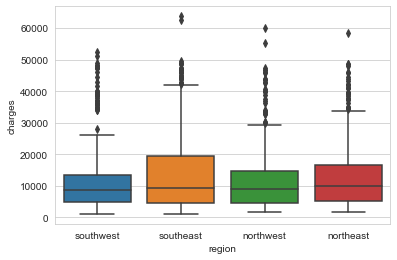

In [38]:
sns.set_style('whitegrid')
sns.boxplot(x=df.region,y=df.charges)

<AxesSubplot:xlabel='region', ylabel='charges'>

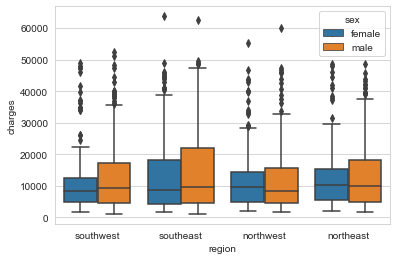

In [39]:
sns.boxplot(x=df.region,y=df.charges,hue=df.sex)

#### Do patients with less or no children have lower medical expenses?

In [40]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [41]:
df.groupby('children').sum().round()

,age,bmi,charges
children,,,
0,22130,17551.0,7098070.0
1,12859,9930.0,4124900.0
2,9467,7435.0,3617655.0
3,6526,4817.0,2410785.0
4,975,785.0,346266.0
5,641,533.0,158149.0


#### Does smoking lead to higher medical expenses?

In [42]:
df.groupby('smoker').sum().round()

,age,bmi,children,charges
smoker,,,,
no,41982,32638.0,1160,8974061.0
yes,10616,8414.0,305,8781764.0


#### What is the correlation between bmi and medical expenses?

In [43]:
df.corr()[['bmi','charges']]

,bmi,charges
age,0.109131,0.299591
bmi,1.000000,0.196221
children,0.010942,0.067998
charges,0.196221,1.000000


<AxesSubplot:>

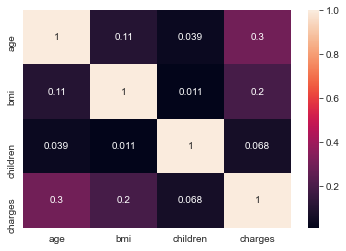

In [44]:
sns.heatmap(df.corr(),annot=True)

In [45]:
from scipy.stats import pearsonr 

In [46]:
pearsonr(df.bmi,df.charges)   # 0.19 is corr value and 3.02 is prob value

(0.19622140737543758, 4.443427400315221e-13)

#### Impute the outliers in age variable with 99th percentile.

In [47]:
np.percentile(df.age,99)

64.0

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

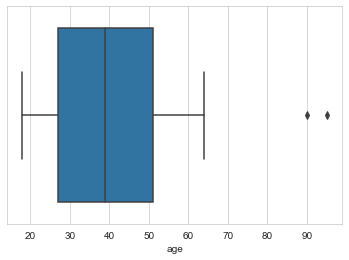

In [48]:
sns.boxplot(df.age)

In [49]:
df.iat[14,0]=64
df.iat[15,0]=64

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

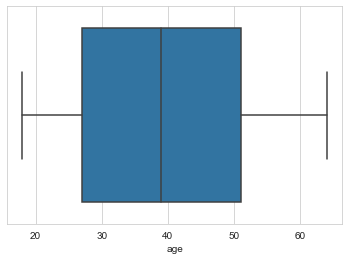

In [50]:
sns.boxplot(df.age)

#### Transform qualitative data into quantitative data. Create dummy variables for Gender.

In [51]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [52]:
df.sex=df.sex.map({'male':0,'female':1})   # by map function

In [53]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.90,0,yes,southwest,16884.9240
1,18,0,33.77,1,no,southeast,1725.5523


In [54]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [55]:
df_dum=pd.get_dummies(df)

In [56]:
df_dum.head()

,age,sex,bmi,children,charges,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,16884.92400,0,1,0,0,0,1
1,18,0,33.770,1,1725.55230,1,0,0,0,1,0
2,28,0,33.000,3,4449.46200,1,0,0,0,1,0
3,33,0,22.705,0,21984.47061,1,0,0,1,0,0
4,32,0,28.880,0,3866.85520,1,0,0,1,0,0


In [57]:
df_dum.isnull().sum()

age                 0
sex                 0
bmi                 0
children            0
charges             0
smoker_no           0
smoker_yes          0
region_northeast    0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64

#### Partition the data (70/30) into training and validation datasets.

In [58]:
df_dum.head(2)

,age,sex,bmi,children,charges,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.90,0,16884.9240,0,1,0,0,0,1
1,18,0,33.77,1,1725.5523,1,0,0,0,1,0


In [59]:
df_dum_num=df_dum.select_dtypes(include=np.number)

In [60]:
df_dum_num.tail()

,age,sex,bmi,children,charges,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
1333,50,0,30.97,3,10600.5483,1,0,0,1,0,0
1334,18,1,31.92,0,2205.9808,1,0,1,0,0,0
1335,18,1,36.85,0,1629.8335,1,0,0,0,1,0
1336,21,1,25.80,0,2007.9450,1,0,0,0,0,1
1337,61,1,29.07,0,29141.3603,0,1,0,1,0,0


In [61]:
X=df_dum_num.drop('charges',axis=1)
X.head()

,age,sex,bmi,children,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,0,1,0,0,0,1
1,18,0,33.770,1,1,0,0,0,1,0
2,28,0,33.000,3,1,0,0,0,1,0
3,33,0,22.705,0,1,0,0,1,0,0
4,32,0,28.880,0,1,0,0,1,0,0


In [62]:
y=df_dum_num.charges
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [65]:
X_test.shape

(402, 10)

In [66]:
X_train.shape

(936, 10)

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
reg=LinearRegression()

In [69]:
reg.fit(X_train,y_train)

LinearRegression()

In [70]:
reg.coef_

array([   260.50086834,    -54.32643045,    345.71119879,    438.0507264 ,
       -11803.65982984,  11803.65982984,    588.56248303,    137.47705989,
         -375.50890691,   -350.53063602])

In [71]:
reg.intercept_

-1000.1340453047142

In [72]:
reg.predict([[24,1,37,2,0,1,0,0,1,0]])

array([30293.12709531])

In [73]:
y_pred=reg.predict(X_test)

In [74]:
reg.score(X_test,y_test)

0.7699659484386902

In [75]:
from sklearn.metrics import r2_score

In [76]:
r2_score(y_test,y_pred)

0.7699659484386902